# FYS4460 - Project 1: Introductory Molecular Dynamics Modeling
Author: Øyvind Sigmundson Schøyen

In this project we'll explore modelling of molecular systems. We'll start our initial study by looking at Argon atoms.

In [25]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from read_lammps_dump import read_dump

sns.set()

Initially we read in data from a lammps simulation.

In [9]:
df = read_dump(os.path.join("velocity-distribution", "dump.lammpstrj"))

In [10]:
df.head()

,id,type,x,y,z,vx,vy,vz
0,1,1,0.00000,0.0,0.0,1.012100,0.213251,0.089516
1,5,1,7.36806,0.0,0.0,-0.153176,1.079850,0.001031
2,9,1,14.73610,0.0,0.0,-0.720942,-2.585440,-0.917600
3,13,1,22.10420,0.0,0.0,-2.083530,1.666840,0.965032
4,17,1,29.47230,0.0,0.0,-2.568510,-2.529350,-2.628410


Next we compute the total magnitude of the velocity

\begin{align}
    v = \sqrt{v_x^2 + v_y^2 + v_z^2}.
\end{align}

In [11]:
df["v"] = np.sqrt(df["vx"] ** 2 + df["vy"] ** 2 + df["vz"] ** 2)

In [5]:
df.head()

,id,type,x,y,z,vx,vy,vz,v
0,1,1,0.00000,0.0,0.0,1.012100,0.213251,0.089516,1.038189
1,5,1,7.36806,0.0,0.0,-0.153176,1.079850,0.001031,1.090660
2,9,1,14.73610,0.0,0.0,-0.720942,-2.585440,-0.917600,2.836591
3,13,1,22.10420,0.0,0.0,-2.083530,1.666840,0.965032,2.837383
4,17,1,29.47230,0.0,0.0,-2.568510,-2.529350,-2.628410,4.461322


In order to differentiate between the different timesteps we create a column for timesteps and add a timestep index.

In [6]:
df["timestep"] = 0

In [7]:
num_timesteps = 501
num_atoms = 4000

for i in range(num_timesteps):
    df.loc[i * num_atoms:(i + 1) * num_atoms, "timestep"] = i

In [100]:
df.tail()

,id,type,x,y,z,vx,vy,vz,v,timestep
2003995,2146,1,20.6496,70.5749,72.5053,-1.441580,0.016375,1.677140,2.211610,500
2003996,2998,1,22.3193,72.7661,73.1262,-0.774966,-1.859060,-0.652021,2.117028,500
2003997,71,1,38.6321,72.0330,73.1013,0.126816,-0.569508,-0.575847,0.819769,500
2003998,1433,1,67.9368,73.1790,72.2959,-2.354610,1.715020,-0.330291,2.931650,500
2003999,980,1,70.9225,73.3010,72.1290,0.398853,-3.297080,2.541540,4.182015,500


## Velocity distribution

According to the central limit theorem, the velocity distribution of the particles will move towards a Maxwell-Boltzmann distribution independent of the initial conditions. __(TODO: Explain the theory behind this)__. We test this statement by initializing our particles with a uniform velocity distribution. We give all particles $i$ a velocity vector $\mathbf{v}_i$ where each component $\mathbf{v}_i = (v^i_x, v^i_y, v^i_z)$ are $v^i_j \in [-2.5, 2.5]$ uniformly drawn. We can see this by visualizing the velocity distribution of each component the particles in the initial timestep.

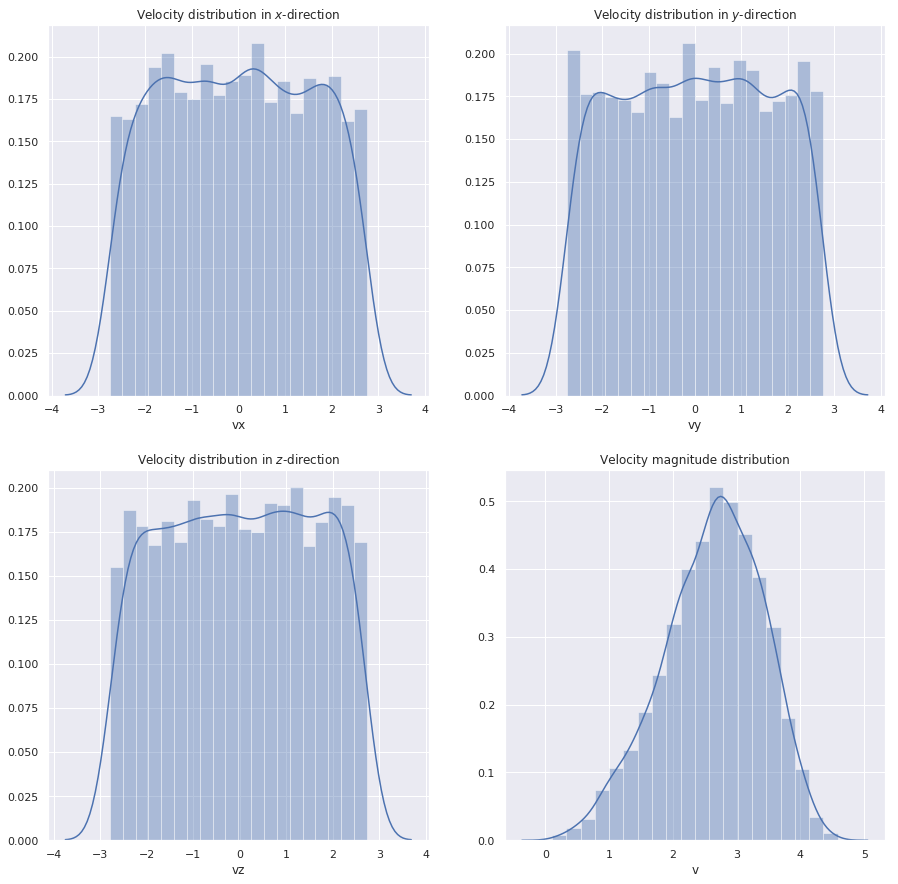

In [41]:
num_bins = 20

fig = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.distplot(df.iloc[:num_atoms].vx, bins=num_bins)
plt.title(r"Velocity distribution in $x$-direction")

plt.subplot(2, 2, 2)
sns.distplot(df.iloc[:num_atoms].vy, bins=num_bins)
plt.title(r"Velocity distribution in $y$-direction")

plt.subplot(2, 2, 3)
sns.distplot(df.iloc[:num_atoms].vz, bins=num_bins)
plt.title(r"Velocity distribution in $z$-direction")

plt.subplot(2, 2, 4)
sns.distplot(df.iloc[:num_atoms].v, bins=num_bins)
plt.title(r"Velocity magnitude distribution")

plt.show()

We see that the components are seemingly uniform in their velocity distribution within $[-2.5, 2.5]$. The radial, or magnitude of the velocities, does not exhibit the same uniformity. Next we check the velocity distribution at the final timestep to see if we've reached a Maxwell-Boltzmann distribution. __(TODO: Expand on this theory: https://en.wikipedia.org/wiki/Uniform_distribution_(continuous))__.

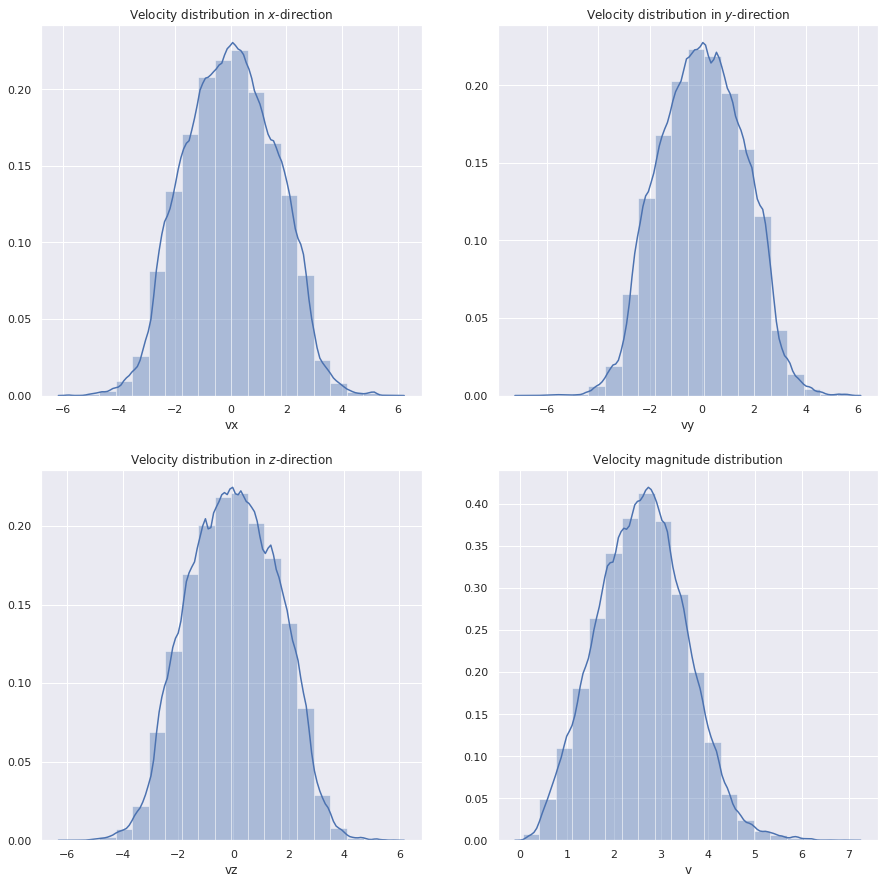

In [42]:
fig = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
sns.distplot(df.iloc[num_atoms:].vx, bins=num_bins)
plt.title(r"Velocity distribution in $x$-direction")

plt.subplot(2, 2, 2)
sns.distplot(df.iloc[num_atoms:].vy, bins=num_bins)
plt.title(r"Velocity distribution in $y$-direction")

plt.subplot(2, 2, 3)
sns.distplot(df.iloc[num_atoms:].vz, bins=num_bins)
plt.title(r"Velocity distribution in $z$-direction")

plt.subplot(2, 2, 4)
sns.distplot(df.iloc[num_atoms:].v, bins=num_bins)
plt.title(r"Velocity magnitude distribution")

plt.show()

We can now see something that resembles the Maxwell-Boltzmann distribution in the plot over the radial velocity distribution. The individual components $v_x$, $v_y$ and $v_z$ become normally distributed around zero. __(TODO: Expand on this theory: https://en.wikipedia.org/wiki/Maxwell%E2%80%93Boltzmann_distribution#Distribution_for_the_velocity_vector)__.